# Importando pacotes e dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("F:/4intelligence/case_1/dados/bcdata.sgs.21082.csv", sep=';', decimal=',')


In [7]:
df.head()

,data,valor
0,01/03/2011,3.17
1,01/04/2011,3.24
2,01/05/2011,3.37
3,01/06/2011,3.32
4,01/07/2011,3.42


In [9]:
df.shape

(149, 2)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   data    149 non-null    object 
 1   valor   149 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


In [11]:
df.isnull().sum()


data     0
valor    0
dtype: int64

In [14]:
#corrigindo os valores para datetime 
df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y')
#convertendo para index
df = df.set_index('data')


In [17]:
df.head()

,valor
data,
2011-03-01,3.17
2011-04-01,3.24
2011-05-01,3.37
2011-06-01,3.32
2011-07-01,3.42


<Axes: xlabel='data', ylabel='valor'>

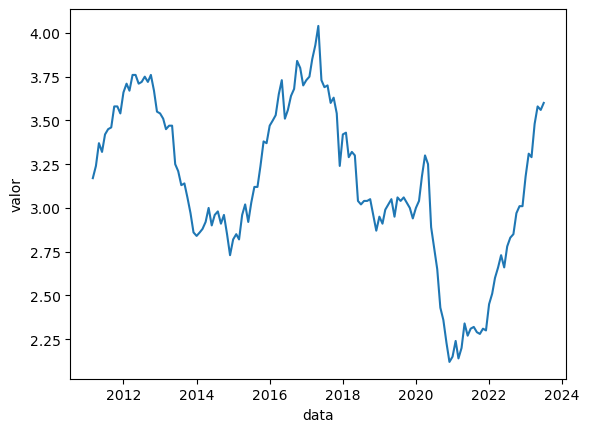

In [19]:
sns.lineplot(data=df, x=df.index, y = df.valor)

- A série parece se comportar de forma cíclica, repetindo um padrão em um intervalo de anos.
- Porém devido ao choque da COVID ela muda de comportamento.
- Devemos olhar como a série se comporta antes e depois da pandemia.
- Fazer dois gráficos que peguem ano a ano de cada ciclo.
- Fazer um gráfico separado apenas para os anos de covid.
- Correlacionar com os anos de recessão econômica
-Pesquisar rolling window

# Estacionariedade

In [29]:
df['rollMean'] = df['valor'].rolling(window=12).mean()
df['rollStd'] = df['valor'].rolling(window=12).std()

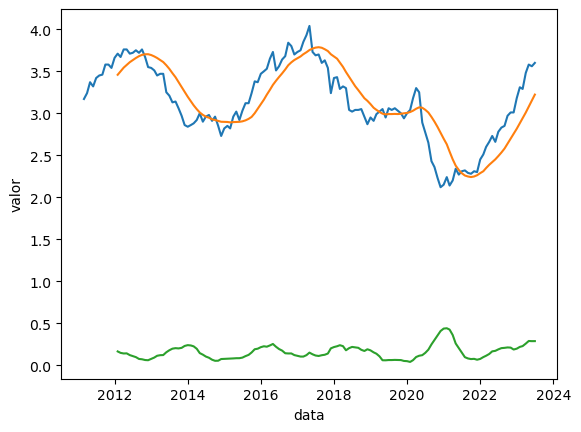

In [32]:
sns.lineplot(data = df, x = df.index, y = df['valor'])
sns.lineplot(data = df, x = df.index, y = df['rollMean'])
sns.lineplot(data = df, x = df.index, y = df['rollStd'])
plt.show()

